In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def uniform_2D_pc_weights(npc, nact,seed=0,sigma=0.1, alpha=1,envsize=1):
    x = np.linspace(-envsize,envsize,int(npc**0.5))
    xx,yy = np.meshgrid(x,x)
    pc_cent = np.concatenate([xx.reshape(-1)[:,None],yy.reshape(-1)[:,None]],axis=1)
    pc_sigma = np.tile(np.eye(2),(npc,1,1))*sigma
    pc_constant = np.ones(npc) * alpha
    return [np.array(pc_cent), np.array(pc_sigma), np.array(pc_constant), 
    1e-5 * np.random.normal(size=(npc,nact)), 1e-5 * np.random.normal(size=(npc,1))]


def predict_placecell(params, x):
    pc_centers, pc_sigmas, pc_constant, actor_weights,critic_weights = params
    npcs = params[0].shape[0]
    pcacts = []
    inv_sigma = np.linalg.inv(pc_sigmas)
    for n in range(npcs):
        diff = (x[:,None]-pc_centers[n][:,None])
        exponent = diff.T @ inv_sigma[n] @ diff
        pcact = np.exp(-0.5*exponent) * pc_constant[n]**2
        pcacts.append(pcact)
    return np.vstack(pcacts)[:,0]

def predict_batch_placecell(params, xs):  
    pcacts = []  
    for x in xs:
        pcacts.append(predict_placecell(params, x))
    pcacts = np.array(pcacts)
    return pcacts


In [7]:
npc = 3**2
nact = 4
sigma = 0.1
params = uniform_2D_pc_weights(npc, nact,sigma=sigma)


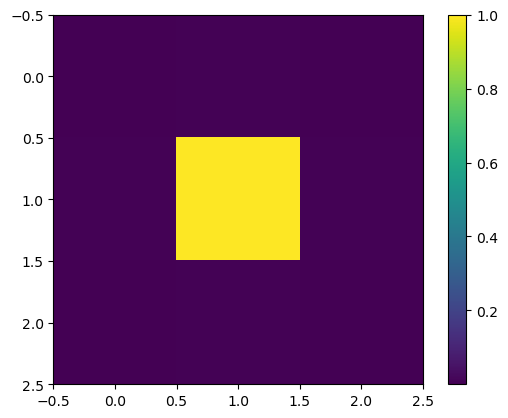

In [8]:
x = np.zeros(2)
pc = predict_placecell(params, x)
plt.imshow(pc.reshape(int(np.sqrt(npc)),int(np.sqrt(npc))))
plt.colorbar()

In [9]:
envsize = 1
x = np.linspace(-envsize,envsize,num=51)
xx,yy = np.meshgrid(x,x)
xs = np.concatenate([xx.reshape(-1)[:,None],yy.reshape(-1)[:,None]],axis=1)


(2601, 2) (2601, 9)


[[0.1 0. ]
 [0.  0.1]]
[[0.1 0.1]
 [0.  0.1]]
(2601, 2) (2601, 9)


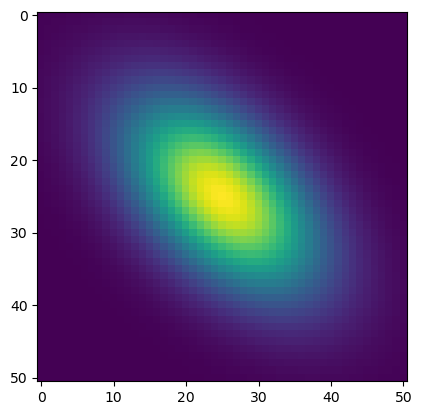

In [11]:
print(params[1][4])
params[1][4][0,1] += 0.1
print(params[1][4])
pcs = predict_batch_placecell(params, xs)
print(xs.shape, pcs.shape)
plt.imshow(pcs[:,4].reshape(51,51))

[[ 0.1  0. ]
 [-0.1  0.1]]
(2601, 2) (2601, 9)


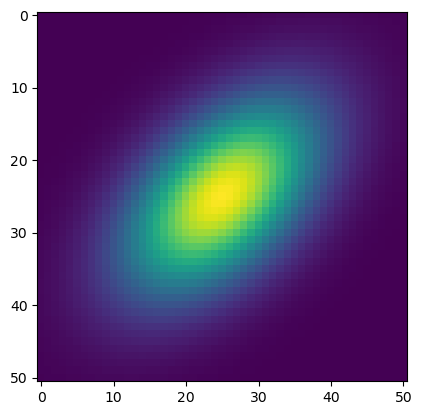

In [14]:
params[1][4][0,1] = 0.0
params[1][4][1,0] = -0.1
print(params[1][4])
pcs = predict_batch_placecell(params, xs)
print(xs.shape, pcs.shape)
plt.imshow(pcs[:,4].reshape(51,51))

[[ 0.1   0.05]
 [-0.05  0.1 ]]
(2601, 2) (2601, 9)


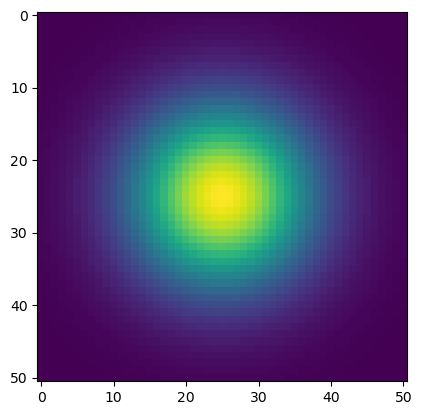

In [34]:
params[1][4] = np.eye(2)*0.1
params[1][4][0,1] += 0.05

params[1][4][1,0] += -0.05
print(params[1][4])
pcs = predict_batch_placecell(params, xs)
print(xs.shape, pcs.shape)
plt.imshow(pcs[:,4].reshape(51,51))